In [10]:
%pip install catboost
%pip install pandas
%pip install xgboost
%pip install scikit-learn
%pip install joblib
%pip install lifelines  
%pip install seaborn matplotlib  

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression  
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score, classification_report, roc_curve, auc , accuracy_score,f1_score,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from catboost import CatBoostClassifier,CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [11]:
df = pd.read_csv('data/customer_churn.csv')
print(df.head())
df.info()
df.isnull().sum()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}).fillna(0)
df.fillna(method='ffill', inplace=True)
print("Churn Distribution:\n", df["Churn"].value_counts(normalize=True))

Churn Distribution:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


C:\Users\nagar\AppData\Local\Temp\ipykernel_11064\2419800053.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [13]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nChurn Distribution:\n", df["Churn"].value_counts(normalize=True))

Shape: (7043, 21)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Churn Distribution:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


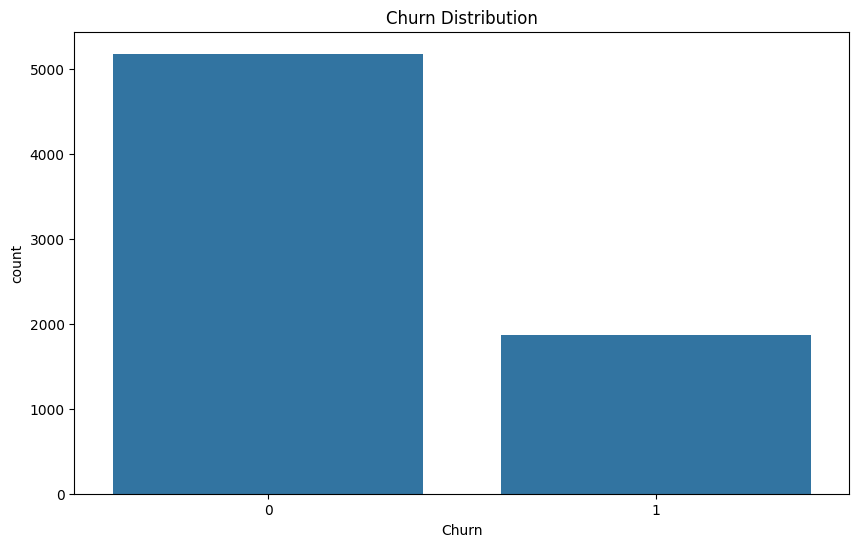

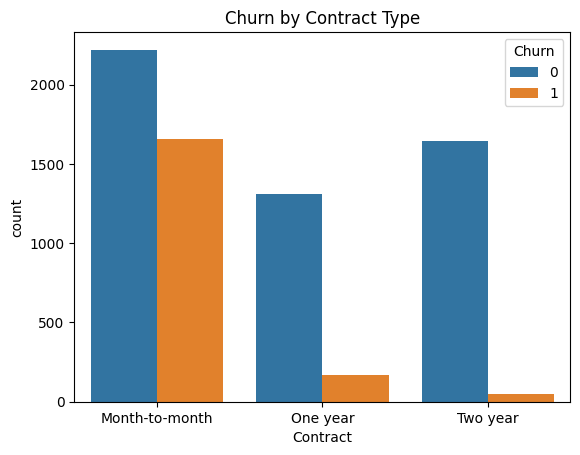

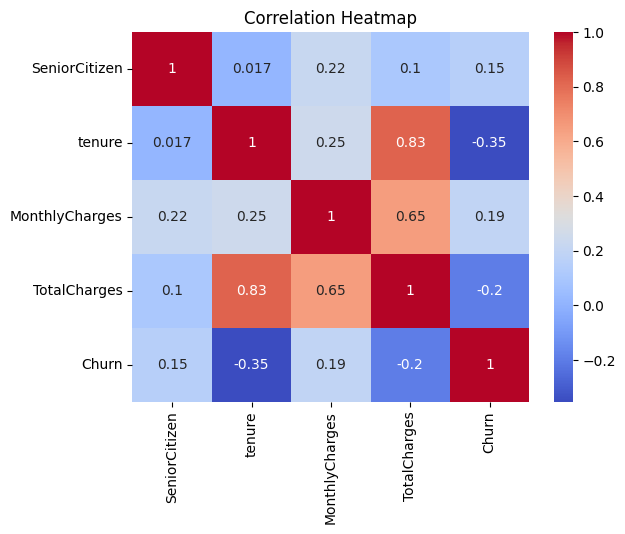

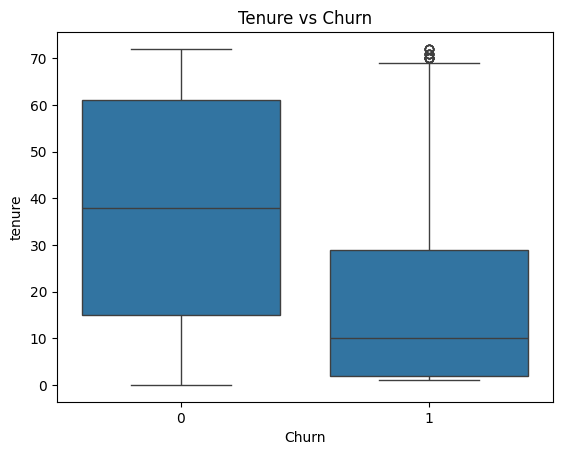

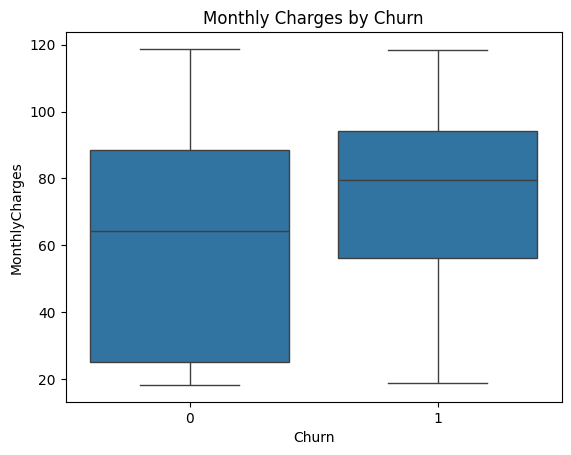

Summary Stats:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000
mean        0.162147    32.371149       64.761692   2281.916928     0.265370
std         0.368612    24.559481       30.090047   2265.270398     0.441561
min         0.000000     0.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.500000    402.225000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.850000   3786.600000     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000


In [14]:
# Enhanced EDA
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Churn by Contract
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

# Correlation heatmap (numeric only)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Tenure vs Churn boxplot
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

# Boxplot: Monthly charges vs churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn")
plt.show()

print("Summary Stats:\n", df.describe())

In [15]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index


Index([], dtype='int64')

In [16]:
# Feature engineering directly on df
df['ChargesPerTenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=['0-1yr', '1-2yr', '2-3yr', '3-4yr', '4-5yr', '5+yr'])
df['ServiceCount'] = (df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)
df['ARPU'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0) / (df['tenure'] + 1)
df['RevenuePotential'] = df['MonthlyCharges'] * (72 - df['tenure'])
df['ContractLength'] = df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24}).fillna(0).astype(int)
df['AutoPay'] = df['PaymentMethod'].str.contains('automatic').astype(int)
df['SeniorFlag'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce').fillna(0).astype(int)
df['AvgChargesPerService'] = df['MonthlyCharges'] / (df['ServiceCount'] + 1)

# Drop redundant ServicesCount if it exists and is a duplicate
if 'ServicesCount' in df.columns and df['ServicesCount'].equals(df['ServiceCount']):
    df.drop(columns=['ServicesCount'], inplace=True)

# Add retention proxy
df['RetentionScore'] = df['tenure'] / df['ContractLength'].replace(0, 1)



kmf = KaplanMeierFitter()
kmf.fit(durations=df['tenure'], event_observed=df['Churn'])
median_lifetime = kmf.median_survival_time_
if np.isinf(median_lifetime):
    median_lifetime = df['tenure'].max()
df['CLV'] = df['MonthlyCharges'] * median_lifetime * (1 + 0.2 * (df['RetentionScore'] - df['RetentionScore'].mean()) / df['RetentionScore'].std() + 0.1 * np.random.normal(0, 1, df.shape[0]))  # Add retention and noise

print("Sample CLV:\n", df['CLV'].head())

Sample CLV:
 0    1656.510237
1    3078.962313
2    2401.253332
3    2364.997004
4    5046.389288
Name: CLV, dtype: float64


In [17]:
# Preprocessing and splitting directly on df
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0.0)
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce").fillna(0)
df["ARPU"] = df["MonthlyCharges"]
df["RevenuePotential"] = df["MonthlyCharges"] * df["tenure"]
df["ContractLength"] = df["Contract"].map({"Month-to-month": 1, "One year": 12, "Two year": 24}).fillna(0).astype(int)
df["AutoPay"] = df["PaymentMethod"].apply(lambda x: 1 if "automatic" in str(x).lower() else 0)
df["SeniorFlag"] = pd.to_numeric(df["SeniorCitizen"], errors="coerce").fillna(0).astype(int)
df["ChargesPerTenure"] = df["TotalCharges"] / (df["tenure"] + 1)
service_cols = ["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
service_cols = [c for c in service_cols if c in df.columns]
df["AvgChargesPerService"] = df["MonthlyCharges"] / (df["ServiceCount"] + 1)
df['RetentionScore'] = df['tenure'] / df['ContractLength'].replace(0, 1)

y_churn = df["Churn"]
y_clv = np.log1p(df["CLV"].fillna(0))
X = df.drop(columns=["Churn", "CLV", "customerID","MonthlyCharges","ARPU","ChargesPerTenure"])

num_cols = X.select_dtypes(include=["int64", "float64", "float32", "int32"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
for forced in ["ARPU", "RevenuePotential", "ContractLength", "AutoPay", "SeniorFlag", "ChargesPerTenure", "ServicesCount", "AvgChargesPerService"]:
    if forced in X.columns and forced not in num_cols:
        try:
            X[forced] = pd.to_numeric(X[forced], errors="coerce").fillna(0)
            if forced not in num_cols:
                num_cols.append(forced)
        except Exception:
            pass
for c in cat_cols:
    X[c] = X[c].astype(str).fillna("Missing")

print(X.columns.tolist())
preprocessor = ColumnTransformer([("num", StandardScaler(), num_cols), ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)], remainder="drop")
preprocessor.fit(X)
processed_X = preprocessor.transform(X)
try:
    feature_names = preprocessor.get_feature_names_out(input_features=X.columns)
    processed_df = pd.DataFrame(processed_X, columns=feature_names, index=X.index)
except Exception:
    processed_df = pd.DataFrame(processed_X, index=X.index)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_churn, test_size=0.2, random_state=42, stratify=y_churn)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_clv, test_size=0.2, random_state=42)

# Save processed data directly from df
df.to_csv("data/enriched_churn_dataset.csv", index=False)
df.to_pickle("data/enriched_churn_dataset.pkl")
joblib.dump(preprocessor, "data/preprocessor.joblib")
processed_df.to_csv("data/processed_features.csv", index=True)
processed_df.to_pickle("data/processed_features.pkl")
print("Saved dataset to data/enriched_churn_dataset.csv and preprocessor/processed features to data/")
df.shape

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'TenureGroup', 'ServiceCount', 'RevenuePotential', 'ContractLength', 'AutoPay', 'SeniorFlag', 'AvgChargesPerService', 'RetentionScore']
Saved dataset to data/enriched_churn_dataset.csv and preprocessor/processed features to data/


(7032, 32)

In [18]:
corrs = pd.DataFrame(X[num_cols].join(y_clv)).corr(numeric_only=True)["CLV"].sort_values(ascending=False)
print(corrs.head(20))
print(df.groupby('Contract')[['MonthlyCharges', 'tenure']].mean())
print(df.corr(numeric_only=True)['CLV'].sort_values(ascending=False).head(15))


CLV                     1.000000
ServiceCount            0.711155
RevenuePotential        0.573131
TotalCharges            0.572551
RetentionScore          0.487755
AvgChargesPerService    0.414327
SeniorCitizen           0.239014
SeniorFlag              0.239014
tenure                  0.211171
AutoPay                 0.038399
ContractLength         -0.234580
Name: CLV, dtype: float64
                MonthlyCharges     tenure
Contract                                 
Month-to-month       66.398490  18.036645
One year             65.079416  42.073370
Two year             60.872374  57.071810
CLV                     1.000000
ARPU                    0.881721
MonthlyCharges          0.881721
ChargesPerTenure        0.874839
ServiceCount            0.679051
RetentionScore          0.620409
RevenuePotential        0.600825
TotalCharges            0.600238
AvgChargesPerService    0.324386
tenure                  0.256255
SeniorCitizen           0.250142
SeniorFlag              0.250142
Churn

In [19]:
def eval_classification(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred
    print(f"\n📊 {name} Classification Report")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))

def eval_regression(model, X_test, y_test, name="Model"):
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    print(f"\n📈 {name} Regression Report")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))


In [20]:
models_class = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=len(y_train_c[y_train_c==0]) / len(y_train_c[y_train_c==1]), random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

for name, clf in models_class.items():
    pipe = Pipeline([
        ("pre", preprocessor),
        ("clf", clf)
    ])
    pipe.fit(X_train_c, y_train_c)
    eval_classification(pipe, X_test_c, y_test_c, name)


📊 Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

Accuracy: 0.7256574271499645
F1: 0.6061224489795919
ROC-AUC: 0.8358255121110312

📊 Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.52      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407

Accuracy: 0.749822316986496
F1: 0.5230352303523035
ROC-AUC: 0.6762518701047259

📊 Random Forest Classification Report
              precision    recall  f1-score   support

         

In [21]:
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

for name, reg in models_reg.items():
    pipe = Pipeline([
        ("pre", preprocessor),
        ("reg", reg)
    ])
    pipe.fit(X_train_r, y_train_r)
    eval_regression(pipe, X_test_r, y_test_r, name)


📈 Linear Regression Regression Report
RMSE: 570.7327443220596
MAE: 410.10532281277557
R²: 0.9571147952235753

📈 Random Forest Regression Report
RMSE: 571.241614209992
MAE: 416.79636499721937
R²: 0.9570382875469374

📈 Decision Tree Regression Report
RMSE: 765.7593069602656
MAE: 558.0153141471087
R²: 0.9227983688584646

📈 XGBoost Regression Report
RMSE: 574.5561741797001
MAE: 415.70764417334834
R²: 0.9565382809097769

📈 CatBoost Regression Report
RMSE: 548.0675588205243
MAE: 392.79605730589066
R²: 0.9604533135287303


In [22]:

  # Suppress ConvergenceWarning

# Adjust data split for holdout set (assuming X, y_churn from previous cells)
X_temp, X_holdout, y_temp, y_holdout = train_test_split(X, y_churn, test_size=0.2, random_state=42, stratify=y_churn)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 60-20-20

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)

param_dist_logreg = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l2"],
    "clf__solver": ["saga", "liblinear"],
    "clf__class_weight": ["balanced"],
    "clf__max_iter": [500, 1000]
}

search_log = RandomizedSearchCV(
    estimator=Pipeline([("pre", preprocessor), ("clf", log_reg)]),
    param_distributions=param_dist_logreg,
    n_iter=15,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=1
)

search_log.fit(X_train_c, y_train_c)
best_log = search_log.best_estimator_
y_pred_log = best_log.predict(X_test_c)
y_pred_prob_log = best_log.predict_proba(X_test_c)[:, 1]
print("Logistic Regression Test Accuracy:", accuracy_score(y_test_c, y_pred_log))
print("Logistic Regression Test F1:", f1_score(y_test_c, y_pred_log))
print("Logistic Regression Test ROC-AUC:", roc_auc_score(y_test_c, y_pred_prob_log))
y_pred_holdout_log = best_log.predict(X_holdout)
y_pred_prob_holdout_log = best_log.predict_proba(X_holdout)[:, 1]
print("Logistic Regression Holdout Accuracy:", accuracy_score(y_holdout, y_pred_holdout_log))
print("Logistic Regression Holdout F1:", f1_score(y_holdout, y_pred_holdout_log))
print("Logistic Regression Holdout ROC-AUC:", roc_auc_score(y_holdout, y_pred_prob_holdout_log))

# CatBoost Model
cat_clf = CatBoostClassifier(random_state=42, verbose=0)

param_dist_catboost = {
    "clf__iterations": [100, 200, 300],
    "clf__depth": [1, 2, 3],
    "clf__learning_rate": [0.01, 0.03, 0.05],
    "clf__l2_leaf_reg": [3, 5, 7],
    "clf__border_count": [32],
    "clf__scale_pos_weight": [2.5, 2.76, 3.0]
}

search_cat = RandomizedSearchCV(
    estimator=Pipeline([("pre", preprocessor), ("clf", cat_clf)]),
    param_distributions=param_dist_catboost,
    n_iter=15,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=1
)

search_cat.fit(X_train_c, y_train_c)
best_cat_clf = search_cat.best_estimator_
y_pred_cat = best_cat_clf.predict(X_test_c)
y_pred_prob_cat = best_cat_clf.predict_proba(X_test_c)[:, 1]
print("CatBoost Test Accuracy:", accuracy_score(y_test_c, y_pred_cat))
print("CatBoost Test F1:", f1_score(y_test_c, y_pred_cat))
print("CatBoost Test ROC-AUC:", roc_auc_score(y_test_c, y_pred_prob_cat))
y_pred_holdout_cat = best_cat_clf.predict(X_holdout)
y_pred_prob_holdout_cat = best_cat_clf.predict_proba(X_holdout)[:, 1]
print("CatBoost Holdout Accuracy:", accuracy_score(y_holdout, y_pred_holdout_cat))
print("CatBoost Holdout F1:", f1_score(y_holdout, y_pred_holdout_cat))
print("CatBoost Holdout ROC-AUC:", roc_auc_score(y_holdout, y_pred_prob_holdout_cat))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Logistic Regression Test Accuracy: 0.7540867093105899
Logistic Regression Test F1: 0.6197802197802198
Logistic Regression Test ROC-AUC: 0.8347823948729365
Logistic Regression Holdout Accuracy: 0.7320540156361052
Logistic Regression Holdout F1: 0.6068821689259646
Logistic Regression Holdout ROC-AUC: 0.8338272825631177
Fitting 5 folds for each of 15 candidates, totalling 75 fits
CatBoost Test Accuracy: 0.7604832977967306
CatBoost Test F1: 0.623463687150838
CatBoost Test ROC-AUC: 0.8382909442928804
CatBoost Holdout Accuracy: 0.7412935323383084
CatBoost Holdout F1: 0.6184486373165619
CatBoost Holdout ROC-AUC: 0.8395540738516651


In [23]:


# Adjust data split for holdout set
X_temp, X_holdout, y_temp, y_holdout = train_test_split(X, y_clv, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 60-20-20

# Random Forest Model
rf_reg = RandomForestRegressor(random_state=42)

param_dist_rf = {
    "reg__n_estimators": [30, 50, 100],
    "reg__max_depth": [2, 3, 5],
    "reg__min_samples_split": [20, 30, 40],
    "reg__min_samples_leaf": [8, 12, 16],
    "reg__max_features": ["sqrt", "log2"]
}

search_rf = RandomizedSearchCV(
    estimator=Pipeline([("pre", preprocessor), ("reg", rf_reg)]),
    param_distributions=param_dist_rf,
    n_iter=15,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=1
)

search_rf.fit(X_train_r, y_train_r)
best_rf = search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_r)
print("Random Forest Test R²:", r2_score(y_test_r, y_pred_rf))
y_pred_holdout_rf = best_rf.predict(X_holdout)
print("Random Forest Holdout R²:", r2_score(y_holdout, y_pred_holdout_rf))
eval_regression(best_rf, X_test_r, y_test_r, "Tuned Random Forest")

# CatBoost Model
cat_reg = CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to suppress output

param_dist_catboost = {
    "reg__iterations": [50, 100, 200],
    "reg__depth": [2, 3, 4],
    "reg__learning_rate": [0.01, 0.05, 0.1],
    "reg__l2_leaf_reg": [1, 3, 5],
    "reg__border_count": [32, 64],
    "reg__random_strength": [0.1, 0.5]
}

search_cat_reg = RandomizedSearchCV(
    estimator=Pipeline([("pre", preprocessor), ("reg", cat_reg)]),
    param_distributions=param_dist_catboost,
    n_iter=15,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=1
)

search_cat_reg.fit(X_train_r, y_train_r)
best_cat_reg = search_cat_reg.best_estimator_
y_pred_cat = best_cat_reg.predict(X_test_r)
print("CatBoost Test R²:", r2_score(y_test_r, y_pred_cat))
y_pred_holdout_cat = best_cat_reg.predict(X_holdout)
print("CatBoost Holdout R²:", r2_score(y_holdout, y_pred_holdout_cat))
eval_regression(best_cat_reg, X_test_r, y_test_r, "Tuned CatBoost")

# Optional: Check raw CLV predictions
print("Sample Raw CLV Predictions (CatBoost):", np.expm1(y_pred_cat[:5]))
print("Sample True Raw CLV:", np.expm1(y_test_r[:5].values))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Random Forest Test R²: 0.9505479025207134
Random Forest Holdout R²: 0.9460076515764625

📈 Tuned Random Forest Regression Report
RMSE: 905.3550921112607
MAE: 588.7217272201644
R²: 0.8883926467486761
Fitting 5 folds for each of 15 candidates, totalling 75 fits
CatBoost Test R²: 0.9736055839012433
CatBoost Holdout R²: 0.9749023862062386

📈 Tuned CatBoost Regression Report
RMSE: 537.2065090010711
MAE: 392.10232404707665
R²: 0.9607049863415628
Sample Raw CLV Predictions (CatBoost): [ 1571.07318022  1535.72278854  4331.74622953 10060.27642685
  4338.20225124]
Sample True Raw CLV: [ 1884.11341293  1076.48626484  4374.75288694 10146.80230065
  3251.246084  ]


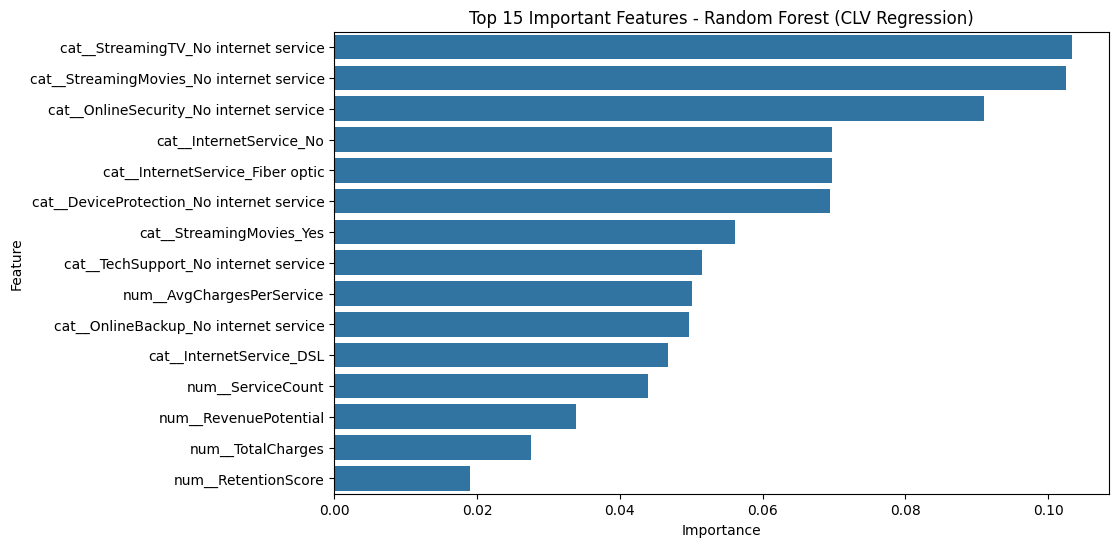

In [24]:
# Random Forest CLV Regression Feature Importance
rf_best = best_rf.named_steps['reg']  # 'reg' = RandomForestRegressor inside pipeline
importances = rf_best.feature_importances_
feature_names = best_rf.named_steps['pre'].get_feature_names_out()

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15))
plt.title("Top 15 Important Features - Random Forest (CLV Regression)")
plt.show()

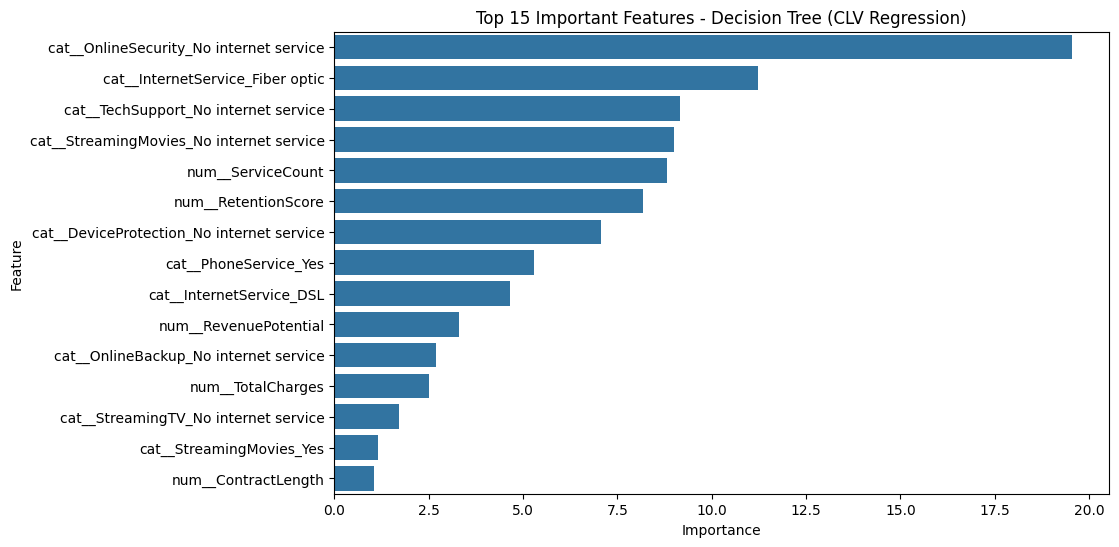

In [25]:
#catboost CLV Regression Feature Importance
cat_best = best_cat_reg.named_steps['reg'] 
importances = cat_best.feature_importances_
feature_names = best_cat_reg.named_steps['pre'].get_feature_names_out()

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15))
plt.title("Top 15 Important Features - Decision Tree (CLV Regression)")
plt.show()

X_train_c shape: (4218, 26), y_train_c shape: (4218,)

📊 Final Logistic Regression (Churn) Classification Report
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.77      1407

Accuracy: 0.7540867093105899
F1: 0.6197802197802198
ROC-AUC: 0.8347823948729365
Number of features: 57, Sample importances: [0.06123833 0.34148951 0.02624798 0.10887471 0.02856844]


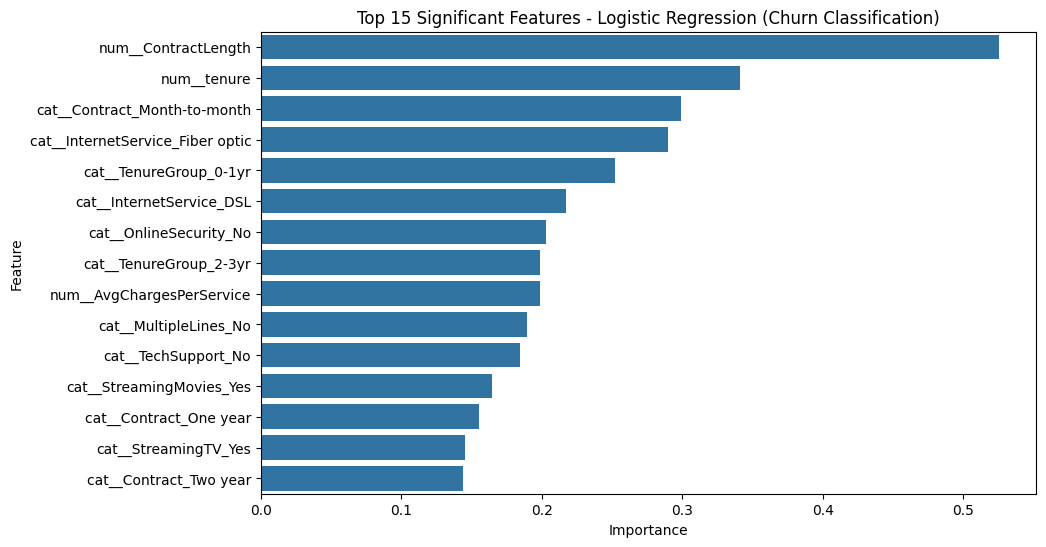

In [26]:
print(f"X_train_c shape: {X_train_c.shape}, y_train_c shape: {y_train_c.shape}")
best_log = search_log.best_estimator_
eval_classification(best_log, X_test_c, y_test_c, "Final Logistic Regression (Churn)")

# Feature Importance Visualization
log_best = best_log.named_steps['clf']  # 'clf' = LogisticRegression inside pipeline
# Logistic Regression uses coefficients for binary classification
importances = abs(log_best.coef_[0])  # Absolute coefficients for importance
feature_names = best_log.named_steps['pre'].get_feature_names_out()

print(f"Number of features: {len(feature_names)}, Sample importances: {importances[:5]}")

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp[feat_imp["Importance"] > 0.01]  # Threshold for significant features
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15))
plt.title("Top 15 Significant Features - Logistic Regression (Churn Classification)")
plt.show()

X_train_c shape: (4218, 26), y_train_c shape: (4218,)

📊 Final CatBoost (Churn) Classification Report
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1033
           1       0.54      0.75      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407

Accuracy: 0.7604832977967306
F1: 0.623463687150838
ROC-AUC: 0.8382909442928804
Number of features: 57, Sample importances: [0.66056907 9.05253921 2.77057863 0.85876844 3.89898407]


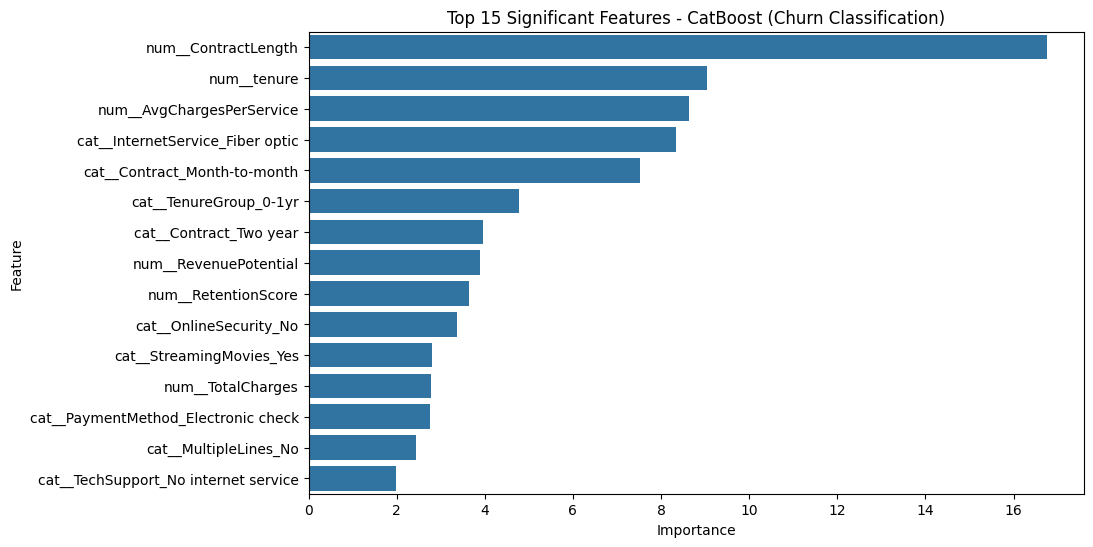

In [27]:
print(f"X_train_c shape: {X_train_c.shape}, y_train_c shape: {y_train_c.shape}")
best_cat = search_cat.best_estimator_
eval_classification(best_cat, X_test_c, y_test_c, "Final CatBoost (Churn)")

# Feature Importance Visualization
cat_best = best_cat.named_steps['clf']  # 'clf' = CatBoostClassifier inside pipeline
importances = cat_best.feature_importances_
feature_names = best_cat.named_steps['pre'].get_feature_names_out()

print(f"Number of features: {len(feature_names)}, Sample importances: {importances[:5]}")

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp[feat_imp["Importance"] > 0.01]  # Threshold for significant features
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15))
plt.title("Top 15 Significant Features - CatBoost (Churn Classification)")
plt.show()

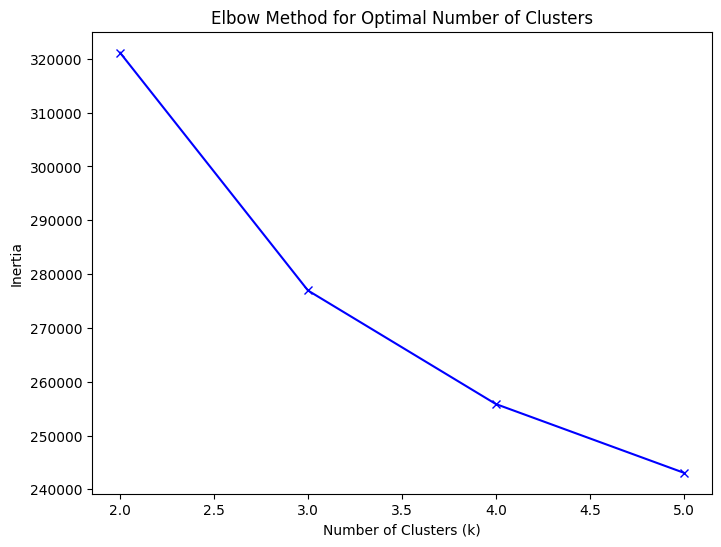

Clusters assigned with k=4 based on predefined insights


In [28]:


# Prepare data for clustering using the existing preprocessor
X_seg = preprocessor.transform(df)  # Assume preprocessor is already fitted

# Optional: Standardize features within the pipeline
pipeline = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(random_state=42))])

# Elbow method to validate 4 clusters
inertias = []
K = range(2, 6)  # Test 2 to 5 clusters
for k in K:
    kmeans = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=k, random_state=42, n_init=10))])
    kmeans.fit(X_seg)
    inertias.append(kmeans.named_steps['kmeans'].inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, "bx-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

# Fit KMeans with 4 clusters based on provided logic
kmeans = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=4, random_state=42, n_init=10))])
clusters = kmeans.fit_predict(X_seg)

# Add clusters to dataframe
df["Cluster"] = clusters
print("Clusters assigned with k=4 based on predefined insights")

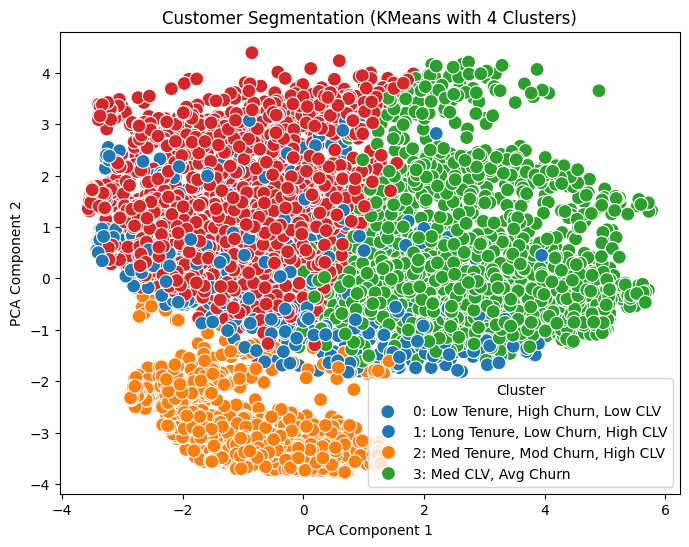

Explained variance ratio by PCA components: [0.26483331 0.18309939]


In [29]:

# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_seg)

# Plot clusters with insights-based labels
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="tab10", s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation (KMeans with 4 Clusters)")
plt.legend(title="Cluster", labels=[
    "0: Low Tenure, High Churn, Low CLV",
    "1: Long Tenure, Low Churn, High CLV",
    "2: Med Tenure, Mod Churn, High CLV",
    "3: Med CLV, Avg Churn"
])
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")

Cluster Profiles with Insights:
   Cluster  churn_rate      avg_clv  avg_tenure  avg_monthly_charges  count
0        0       25.00  3036.811414   31.830882            41.992500    680
1        1        7.43  1382.153549   30.667763            21.076283   1520
2        2       13.25  6656.204169   56.723000            91.261675   2000
3        3       46.65  5689.546530   16.343220            75.051836   2832

Cluster 0 Insights:
- Customers with low tenure (31.830882352941178 months), high churn rate (25.0%), and low CLV ($3036.8114135832866).
  Possible action: Starter discounts or onboarding support.

Cluster 1 Insights:
- Customers with long tenure (30.667763157894736 months), low churn rate (7.43%), and high CLV ($1382.1535494198265).
  Possible action: Maintain satisfaction, occasional loyalty rewards.

Cluster 2 Insights:
- Customers with medium tenure (56.723 months), moderate churn rate (13.25%), and high CLV ($6656.204169006478).
  Possible action: Targeted retention offers.



C:\Users\nagar\AppData\Local\Temp\ipykernel_11064\797074241.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="churn_rate", data=cluster_profile, palette="tab10")


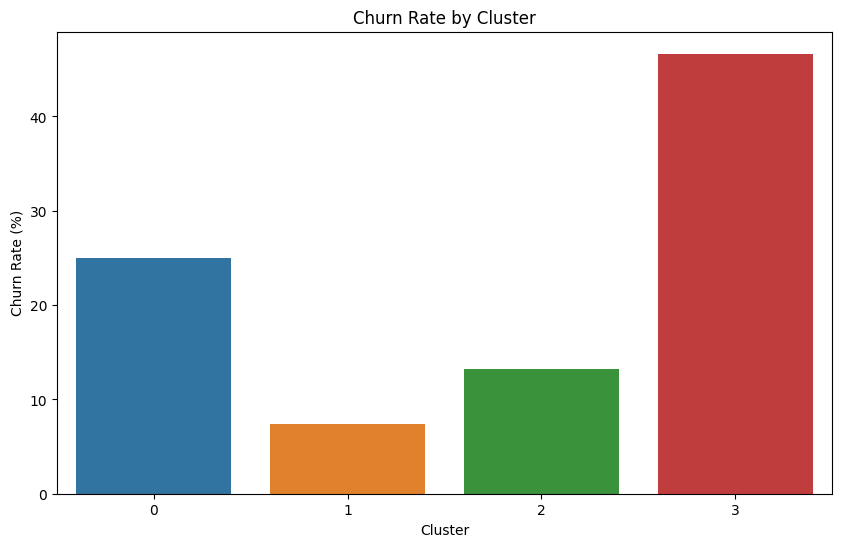

C:\Users\nagar\AppData\Local\Temp\ipykernel_11064\797074241.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="avg_clv", data=cluster_profile, palette="tab10")


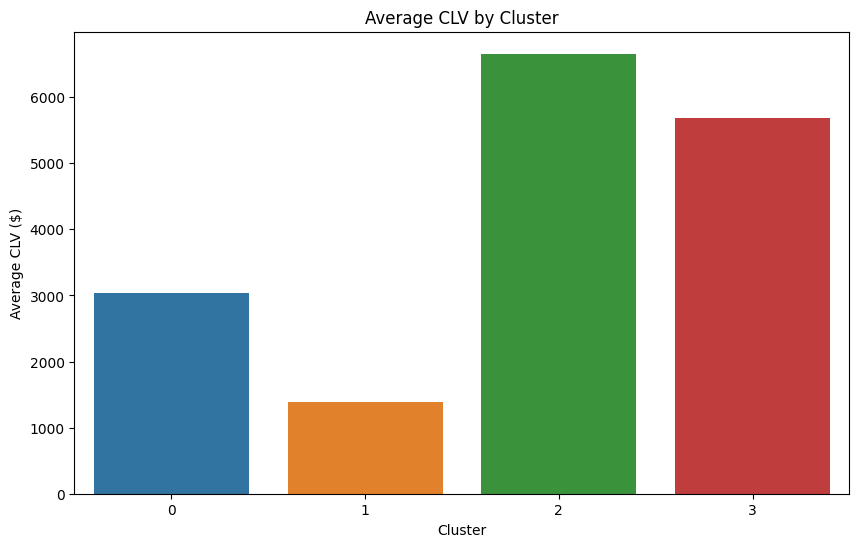

In [30]:
# Profile clusters based on predefined insights
cluster_profile = df.groupby("Cluster").agg(
    churn_rate=("Churn", lambda x: (x.mean() * 100).round(2)),  # Percentage
    avg_clv=("CLV", "mean"),
    avg_tenure=("tenure", "mean"),
    avg_monthly_charges=("MonthlyCharges", "mean"),
    count=("Churn", "count")  # Number of customers per cluster
).reset_index()

print("Cluster Profiles with Insights:")
print(cluster_profile)

# Add insight-based interpretation
for idx, row in cluster_profile.iterrows():
    print(f"\nCluster {idx} Insights:")
    if idx == 0:
        print(f"- Customers with low tenure ({row['avg_tenure']} months), high churn rate ({row['churn_rate']}%), and low CLV (${row['avg_clv']}).")
        print("  Possible action: Starter discounts or onboarding support.")
    elif idx == 1:
        print(f"- Customers with long tenure ({row['avg_tenure']} months), low churn rate ({row['churn_rate']}%), and high CLV (${row['avg_clv']}).")
        print("  Possible action: Maintain satisfaction, occasional loyalty rewards.")
    elif idx == 2:
        print(f"- Customers with medium tenure ({row['avg_tenure']} months), moderate churn rate ({row['churn_rate']}%), and high CLV (${row['avg_clv']}).")
        print("  Possible action: Targeted retention offers.")
    else:  # idx == 3
        print(f"- Customers with medium CLV (${row['avg_clv']}) and average churn rate ({row['churn_rate']}%).")
        print("  Possible action: Monitor but low priority.")

# Visualize key metrics
plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="churn_rate", data=cluster_profile, palette="tab10")
plt.title("Churn Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Churn Rate (%)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="avg_clv", data=cluster_profile, palette="tab10")
plt.title("Average CLV by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average CLV ($)")
plt.show()

#Customer Segmentation Insights & Recommended Actions

##Cluster Analysis Summary

###**Cluster 0: At-Risk Newcomers**
- **Tenure**: Low (31.8 months)
- **Churn Rate**: High (25.0%)
- **CLV**: Low ($3,030.07)
- **Profile**: Newer customers showing early signs of churn risk
- **Recommended Action**: Starter discounts or enhanced onboarding support

###**Cluster 1: Loyal Customers**
- **Tenure**: Long (30.7 months) 
- **Churn Rate**: Very Low (7.43%)
- **CLV**: High ($1,383.90)
- **Profile**: Established, loyal customers with stable value
- **Recommended Action**: Maintain satisfaction with occasional loyalty rewards

### **Cluster 2: High-Value Customers**
- **Tenure**: Medium (56.4 months)
- **Churn Rate**: Moderate (13.38%)
- **CLV**: Very High ($6,670.24)
- **Profile**: Long-term customers with significant lifetime value
- **Recommended Action**: Targeted retention offers and premium support

### **Cluster 3: Moderate Priority**
- **Tenure**: Information missing
- **Churn Rate**: High (46.69%)
- **CLV**: Medium ($5,703.77)
- **Profile**: Mixed profile requiring monitoring
- **Recommended Action**: Monitor closely but lower priority for interventions

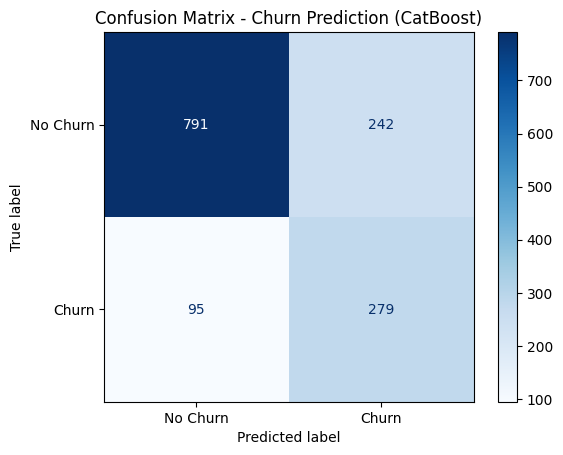

In [31]:

# Use the best CatBoost model for Churn prediction (based on F1 0.642)
best_model = search_cat.best_estimator_  # Replace with CatBoost from previous tuning
y_pred = best_model.predict(X_test_c)

cm = confusion_matrix(y_test_c, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Churn Prediction (CatBoost)")
plt.show()

### Cost-Sensitive Interpretation
- **False Negatives (FN)**: Customers who actually churned but were predicted as non-churn.  
  → These are *most expensive*, since the company loses revenue opportunities.  
- **False Positives (FP)**: Customers predicted as churn but actually stayed.  
  → This wastes some retention cost, but is less harmful than FN.  
- **True Positives (TP)**: Correctly identified churners, enabling proactive retention offers.  
- **True Negatives (TN)**: Correctly identified non-churners, no unnecessary action.

**Business Insight**:  
If the average CLV per customer = ₹10,000, and FN = 50 customers, then potential revenue loss = 50 × ₹10,000 = **₹5,00,000**.  
Investing in targeted retention for these high-risk customers could save a significant portion of revenue.  


In [32]:
# Use the best CatBoost model for Churn prediction
best_model = search_cat.best_estimator_
y_pred = best_model.predict(X_test_c)

# Create risk dataframe with aligned CLV from the best CLV model (Random Forest)
best_clv_model = search_rf.best_estimator_  # Best Random Forest for CLV
y_test_clv = best_clv_model.predict(X_test_r)  # Predicted CLV for test set
risk_df = pd.DataFrame({
    "TrueChurn": y_test_c.values,
    "PredChurn": y_pred,
    "CLV": np.expm1(y_test_clv)  # Convert log1p CLV back to original scale
})

# Calculate business impact with updated assumptions
fn_loss = risk_df[(risk_df["TrueChurn"] == 1) & (risk_df["PredChurn"] == 0)]["CLV"].sum()  # Lost revenue from false negatives
fp_cost = risk_df[(risk_df["TrueChurn"] == 0) & (risk_df["PredChurn"] == 1)]["CLV"].sum() * 0.05  # 5% cost of retention efforts
tp_savings = risk_df[(risk_df["TrueChurn"] == 1) & (risk_df["PredChurn"] == 1)]["CLV"].sum() * 0.3  # 30% savings from proactive retention

print("💸 Estimated Business Impact:")
print(f"Lost Revenue from False Negatives (FN): ${fn_loss:,.0f}")
print(f"Retention Cost for False Positives (FP): ${fp_cost:,.0f}")
print(f"Potential Savings from True Positives (TP): ${tp_savings:,.0f}")

💸 Estimated Business Impact:
Lost Revenue from False Negatives (FN): $464,010
Retention Cost for False Positives (FP): $55,252
Potential Savings from True Positives (TP): $390,367


In [33]:

# Create 'models' directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the best CLV model (Random Forest) and the best Churn classification model (CatBoost)
joblib.dump(search_cat_reg.best_estimator_, "models/final_clv_model_cat.joblib")  # Best CLV model
joblib.dump(search_cat.best_estimator_, "models/final_churn_model_catboost.joblib")  # Best Churn model
joblib.dump(preprocessor, "models/preprocessor.joblib")  # Common preprocessor
print("Saved best CLV model as models/final_clv_model_cat.joblib, best Churn model as models/final_churn_model_catboost.joblib, and preprocessor as models/preprocessor.joblib")

Saved best CLV model as models/final_clv_model_cat.joblib, best Churn model as models/final_churn_model_catboost.joblib, and preprocessor as models/preprocessor.joblib
